In [2]:
import pandas as pd
df = pd.read_csv(r'ReID_csv\ReID_atten_train_logv1_0.csv')
# df2 = pd.read_csv("atten/training_logs_2.csv")
# df = pd.concat([df, df2], ignore_index=True)   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   epoch        1989 non-null   int64  
 1   loss         1989 non-null   float64
 2   train_intra  1989 non-null   float64
 3   train_inter  1989 non-null   float64
 4   val_intra    1989 non-null   float64
 5   val_inter    1989 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 93.4 KB


In [3]:
df = df.replace(r'^\s*$', float('nan'), regex=True)
df = df.astype({
    "loss": float,
    "train_intra": float,
    "train_inter": float,
    "val_intra": float,
    "val_inter": float
})

In [4]:
def moving_average_ignore_nans(df: pd.DataFrame, window: int) -> pd.DataFrame:
    """
    Compute moving average ignoring NaN values.

    Parameters:
        df (pd.DataFrame): Input DataFrame with numeric values and NaNs.
        window (int): Window size for moving average.

    Returns:
        pd.DataFrame: Smoothed DataFrame with same shape.
    """
    return df.rolling(window=window, min_periods=1).mean()

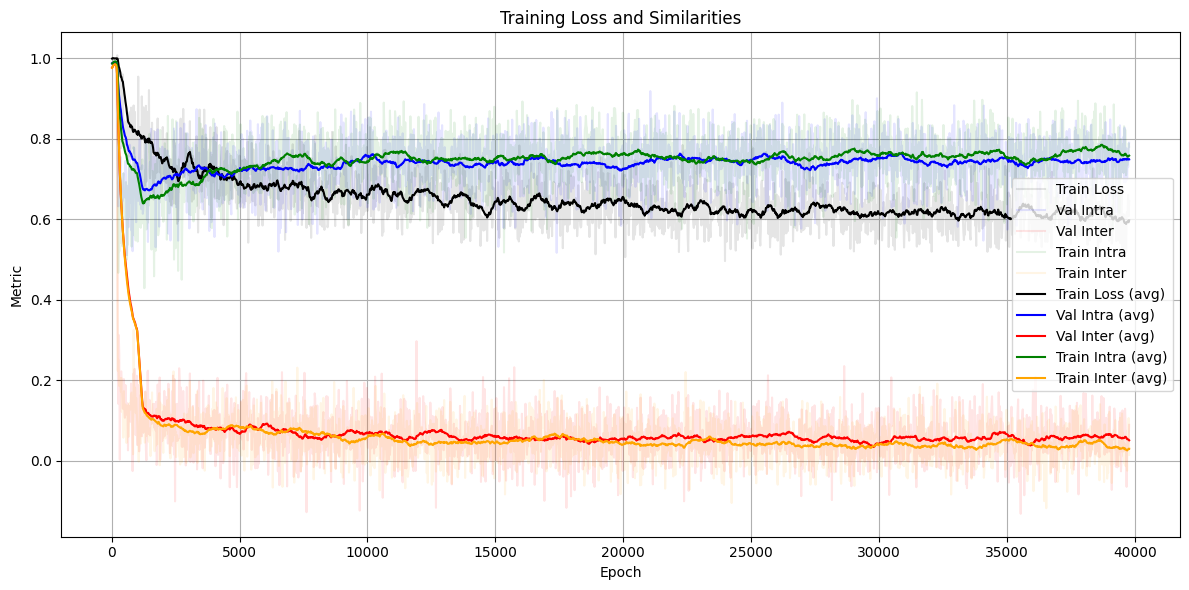

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

loss_window = 20
sim_window = 50
smoothed = df.copy()
smoothed['loss'] = df['loss'].rolling(window=loss_window, min_periods=1).mean()
for col in ['train_intra', 'train_inter', 'val_intra', 'val_inter']:
    smoothed[col] = df[col].rolling(window=sim_window, min_periods=1).mean()

plt.plot(df['epoch'], df['loss'], label='Train Loss', color='black', alpha=0.1)
plt.plot(df['epoch'], df['val_intra'], '-', label='Val Intra', color='blue', alpha=0.1)
plt.plot(df['epoch'], df['val_inter'], '-', label='Val Inter', color='red', alpha=0.1)
plt.plot(df['epoch'], df['train_intra'], '-', label='Train Intra', color='green', alpha=0.1)
plt.plot(df['epoch'], df['train_inter'], '-', label='Train Inter', color='orange', alpha=0.1)

# Plot smoothed data (bold lines)
plt.plot(smoothed['epoch'], smoothed['loss'], label='Train Loss (avg)', color='black')
plt.plot(smoothed['epoch'], smoothed['val_intra'], label='Val Intra (avg)', color='blue')
plt.plot(smoothed['epoch'], smoothed['val_inter'], label='Val Inter (avg)', color='red')
plt.plot(smoothed['epoch'], smoothed['train_intra'], label='Train Intra (avg)', color='green')
plt.plot(smoothed['epoch'], smoothed['train_inter'], label='Train Inter (avg)', color='orange')


plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training Loss and Similarities')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("training_plot_attenv1.png", dpi=300)

plt.show()

<Axes: xlabel='epoch'>

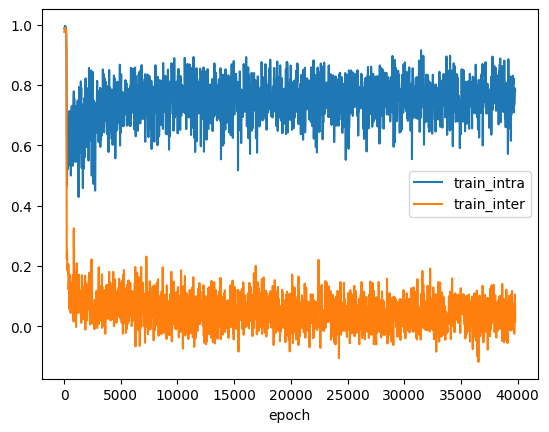

In [6]:
df.plot(x="epoch", y=["train_intra", "train_inter"])